In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')

For df1:

Take a look at the data in df1.

Does x increase from time one to time two?

Visualize the relationship between x and time.

Run a statistical test to further examine the relationship between these features.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


In [4]:
# on average x increases from time one to time two
df1.groupby('time')[['x']].mean()

,x
time,
one,5.726669
two,7.296448


In [8]:
df1.isna().sum()

group    0
x        0
time     0
dtype: int64

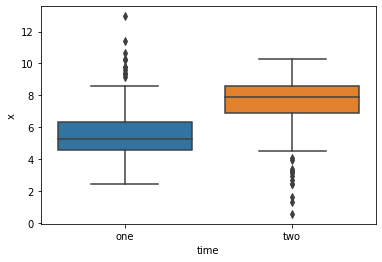

In [10]:
sns.boxplot(x=df1.time, y=df1.x)
plt.show()

Hypothesis testing

Ho: there is no difference between the average of x in the time=one subset vs the time=two subset or the average of x in the time=two subset is smaller

Ha: the average of x in the time=two subset is higher than the average of x in the time=one subset

In [13]:
x1 = df1[df1.time == 'one'].x
x2 = df1[df1.time == 'two'].x

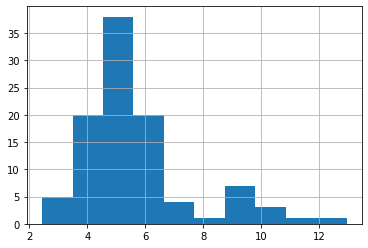

In [16]:
x1.hist()
plt.show()

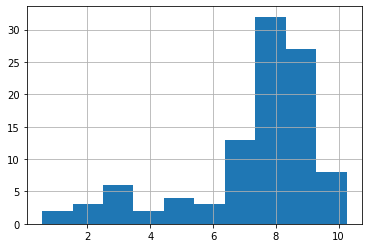

In [17]:
x2.hist()
plt.show()

In [18]:
print(x1.var())
print(x2.var())

3.8438570575420026
4.471025912739981


In [20]:
alpha = .05
# two sample, one tailed t-test
t, p = stats.ttest_ind(x2, x1)
print('t value:', t)
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

t value: 5.443902721870272
is p/2 < alpha?  True
is t > 0?  True


For df2:

Take a look at the data in df2.

Visualize the relationship between x and y.

How would you describe the relationship between x and y?

Run a statistical test to examine the relationship between x and y.

In [21]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


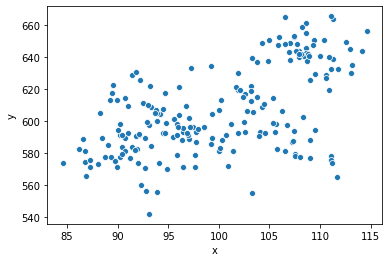

In [23]:
sns.scatterplot(data=df2, x='x', y='y')
plt.show()

For df3:

Take a look at the data in df3

Which surgeon has the higher success rate?

If you had to have heart bypass surgery, which surgeon should you go to?

For df1 and df2, what happens to the relationships if you take into account the group feature?